# WQD7006 Data Mining Group Assignment (GROUP 5)
##Electrical Fault detection and classification


1.   LOW SEH HONG S2178662
2.   HAOJIE CHU S2175919
3.   ZHANG YU S2128100
4.   KIAN WAI WONG S2180506
5.   TIMOTHY CHEN XIAN YII 22056170





##1.INTRODUCTION

A transmission line is a crucial component within the power system, as it is essential for transmitting electrical power from the source area to the distribution network. In our modern era, the demand for power has increased exponentially. Therefore, it is crucial to minimize any potential faults within the power system, as electrical power is essential for our daily lives. The electrical power system is made up of several intricate, dynamic, and interacting components that are always vulnerable to electrical faults or disturbances.

In order for high-capacity electrical generating power plants and the grid to remain stable. fault detection and protection equipment operation have to happen as quickly as feasible. To minimise downtime, defects on transmission lines for the electrical power system must first be accurately identified and classified. Using machine learning algorithms can help in electrical fault detection and therefore aid in avoding electrical system outages.

Various machine learning algorithms are employed in this project which are

1. Decision Tree (DT)
2. Random Forest (RF)
3. Naive Bayes (NB)
4. k-Nearest Neighbour (kNN)

The performance of each machine learning model is assessed with metrics such as accuracy, precision, recall, and F-1 Score.

The simulation of the fault analysis is modelled by the power system and the diagram is retrieved from Kaggle. Four 11 x 10^3 V generators, one at each end of the transmission line, make up the power system. Transformers are positioned halfway along a transmission line to model and investigate different types of failures. The simulation of the circuit is performed under normal conditions and also under various fault conditions. At the power system's output side, the measured Line Voltage and Line Currents are collected. Nearly 12,000 data points are collected this way and then the data is labeled.

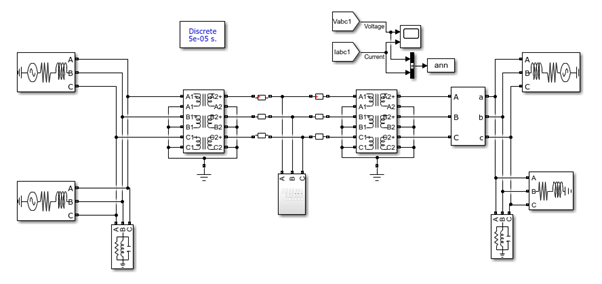
            


###1.1 Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/classData.csv')

# Display the five rows of the dataset
print("First five rows of the dataset:")
data.head()

First five rows of the dataset:


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


**Data Description**

It's important to note that when the fault category is 1 for a specific type (G, C, B, or A), it indicates the presence of a fault of that category in the system.

**G** - Fault Category G (Ground Fault): The value is 1 if the system experiences a ground fault.

**C** - Fault Category C (Phase C Fault): The value is 1 if there's a fault in phase C of the system.

**B** - Fault Category B (Phase B Fault): The value is 1 if there's a fault in phase B of the system.

**A** - Fault Category A (Phase A Fault): The value is 1 if there's a fault in phase A of the system.

**Ia** - Line Current of Phase A: Represents the current flowing through phase A of the power system.

**Ib** - Line Current of Phase B: Represents the current flowing through phase B of the power system.

**Ic** - Line Current of Phase C: Represents the current flowing through phase C of the power system.

**Va** - Line Voltage of Phase A: Represents the voltage in phase A of the power system.

**Vb** - Line Voltage of Phase B: Represents the voltage in phase B of the power system.

**Vc** - Line Voltage of Phase C: Represents the voltage in phase C of the power system.

## 2.EDA

### 2.1 Check Data Quality

In [ ]:
# General information about dtypes and null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
# Checking for missing values
print("\nChecking for missing values:")
missing_values = data.isnull().sum()

# Checking for any duplicates
duplicate_rows = data.duplicated().sum()

missing_values,duplicate_rows


Checking for missing values:


(G     0
 C     0
 B     0
 A     0
 Ia    0
 Ib    0
 Ic    0
 Va    0
 Vb    0
 Vc    0
 dtype: int64,
 0)

### 2.2 Descriptive Statistic

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


### 2.3 Data Distribution

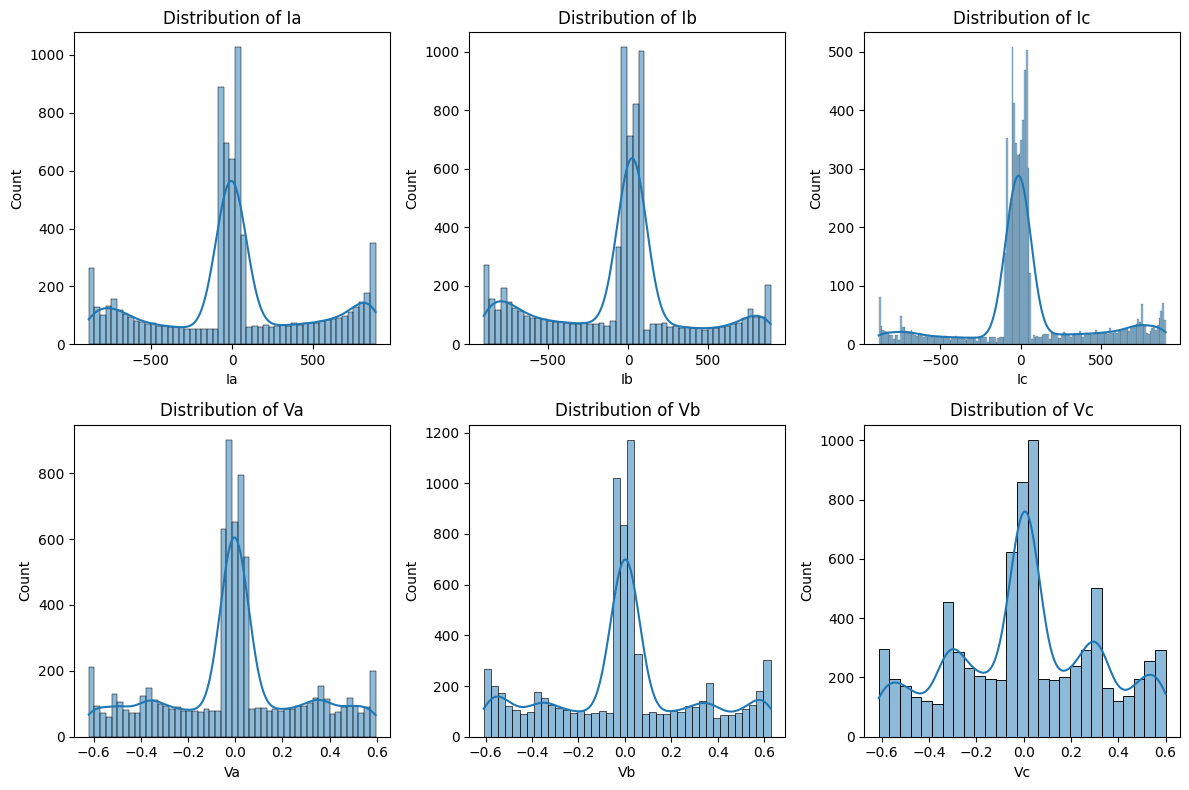

In [ ]:
# Histograms for each feature
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

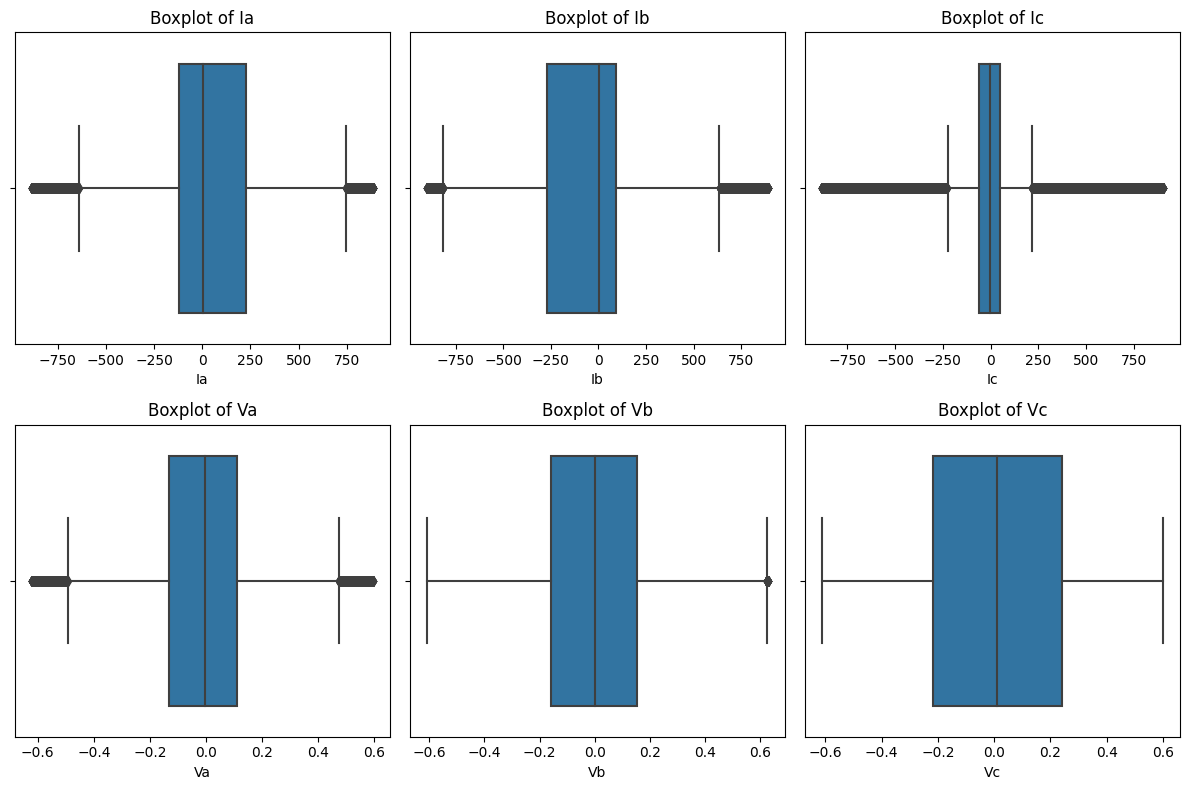

In [ ]:
# boxplot for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)

    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### 2.4 Correlation Metric


Correlation Matrix:
          Ia        Ib        Ic        Va        Vb        Vc
Ia  1.000000 -0.374241 -0.276457  0.035682 -0.274612  0.246043
Ib -0.374241  1.000000 -0.528291  0.029118  0.032101 -0.060023
Ic -0.276457 -0.528291  1.000000 -0.069137 -0.056967  0.122919
Va  0.035682  0.029118 -0.069137  1.000000 -0.480247 -0.450225
Vb -0.274612  0.032101 -0.056967 -0.480247  1.000000 -0.566986
Vc  0.246043 -0.060023  0.122919 -0.450225 -0.566986  1.000000


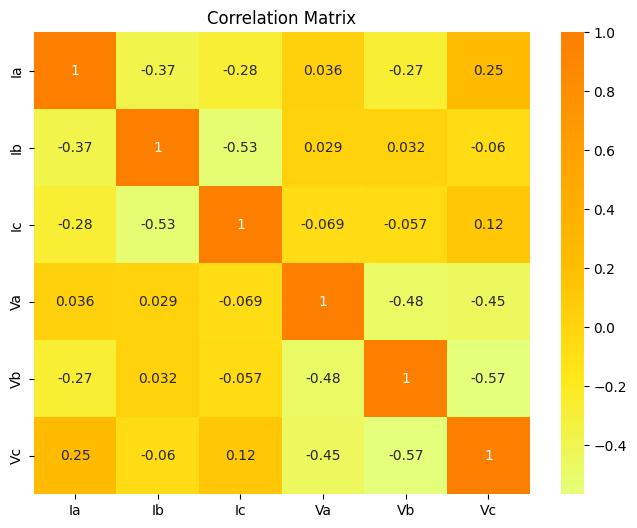

In [ ]:
# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = data[features].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='Wistia', annot=True)
plt.title('Correlation Matrix')
plt.show()

### 2.5 Define Fault Types

In [ ]:
# Converting the fault indicator columns to a single label representing the type of fault
data['Fault_Type'] = data[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)

# Defining the fault types
fault_types = {
    '0000': 'No Fault',
    '1000': 'Single Line to Ground A',
    '0100': 'Single Line to Ground B',
    '0010': 'Single Line to Ground C',
    '0011': 'Line-to-Line BC',
    '0101': 'Line-to-Line AC',
    '1001': 'Line-to-Line AB',
    '1010': 'Line-to-Line with Ground AB',
    '0101': 'Line-to-Line with Ground AC',
    '0110': 'Line-to-Line with Ground BC',
    '0111': 'Three-Phase',
    '1111': 'Three-Phase with Ground',
    '1011': 'Line A Line B to Ground Fault'
}

# Mapping fault type codes to fault type names
data['Fault_Type'] = data['Fault_Type'].map(fault_types)

# Counting the occurrences of each fault type
fault_type_counts = data['Fault_Type'].value_counts()
fault_type_counts

No Fault                         2365
Line A Line B to Ground Fault    1134
Three-Phase with Ground          1133
Line-to-Line AB                  1129
Three-Phase                      1096
Line-to-Line with Ground BC      1004
Name: Fault_Type, dtype: int64

### 2.6 Visualization of fault types

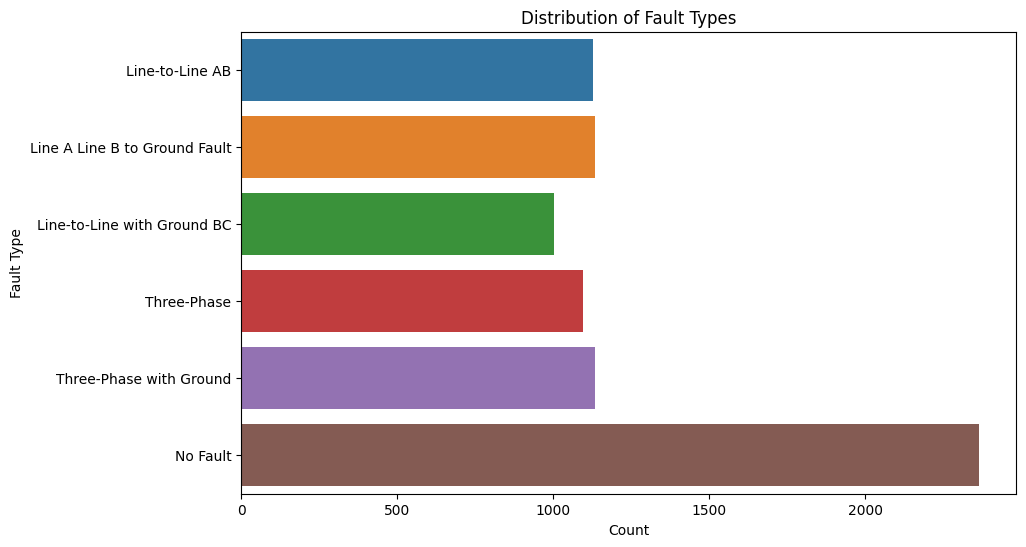

In [ ]:
# Plotting the distribution of fault types
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Fault_Type'])
plt.title('Distribution of Fault Types')
plt.xlabel('Count')
plt.ylabel('Fault Type')
plt.show()

The bar chart reveals that **"No Fault"** conditions are most prevalent in the dataset, significantly outnumbering instances of each specific fault type. The fault types **"Three-Phase with Ground"**, **"Three-Phase",** **"Line-to-Line with Ground BC", "Line A Line B to Ground Fault"**, and **"Line-to-Line AB"** are represented with relatively similar frequencies, although none as frequently as "No Fault." The distribution suggests a dataset with a substantial proportion of normal operating conditions and a balanced representation of various fault conditions.

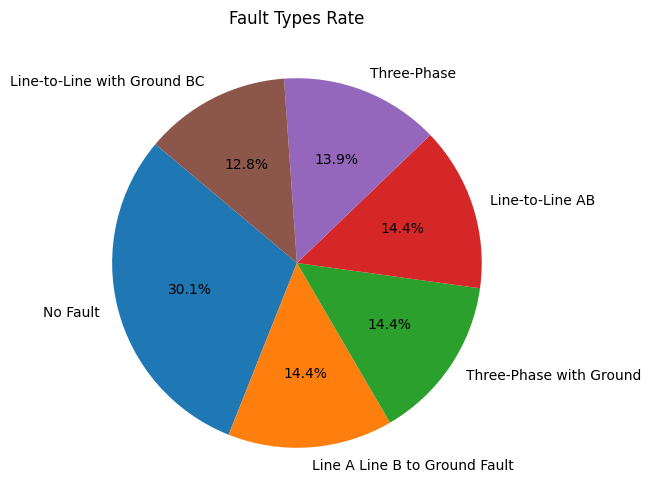

In [ ]:
# Plotting the pie chart for fault type
labels = fault_type_counts.index
sizes = fault_type_counts.values


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Fault Types Rate')
plt.show()


The pie chart illustrates the distribution of different types of faults within the dataset:

- **No Fault**: This category is the largest, comprising 30.1% of the dataset, indicating that more than a third of the cases do not have any faults detected.
- **Fault Type Distribution**: The rest of the fault types are relatively evenly distributed, each accounting for between 12.8% to 14.4% of the total. Specifically, the Three-Phase fault and two Line-to-Line faults (Line-to-Line AB and Line-to-Line with Ground BC) share the highest proportion at 14.4% each.
- **Three-Phase with Ground**: This has a slightly smaller share at 13.9%.
- **Other Faults**: The remaining fault types (Line A Line B to Ground Fault and Line-to-Line with Ground BC) are slightly less common, at 14.4% and 12.8%, respectively.

### 2.7 Feature Distributions by Fault Type

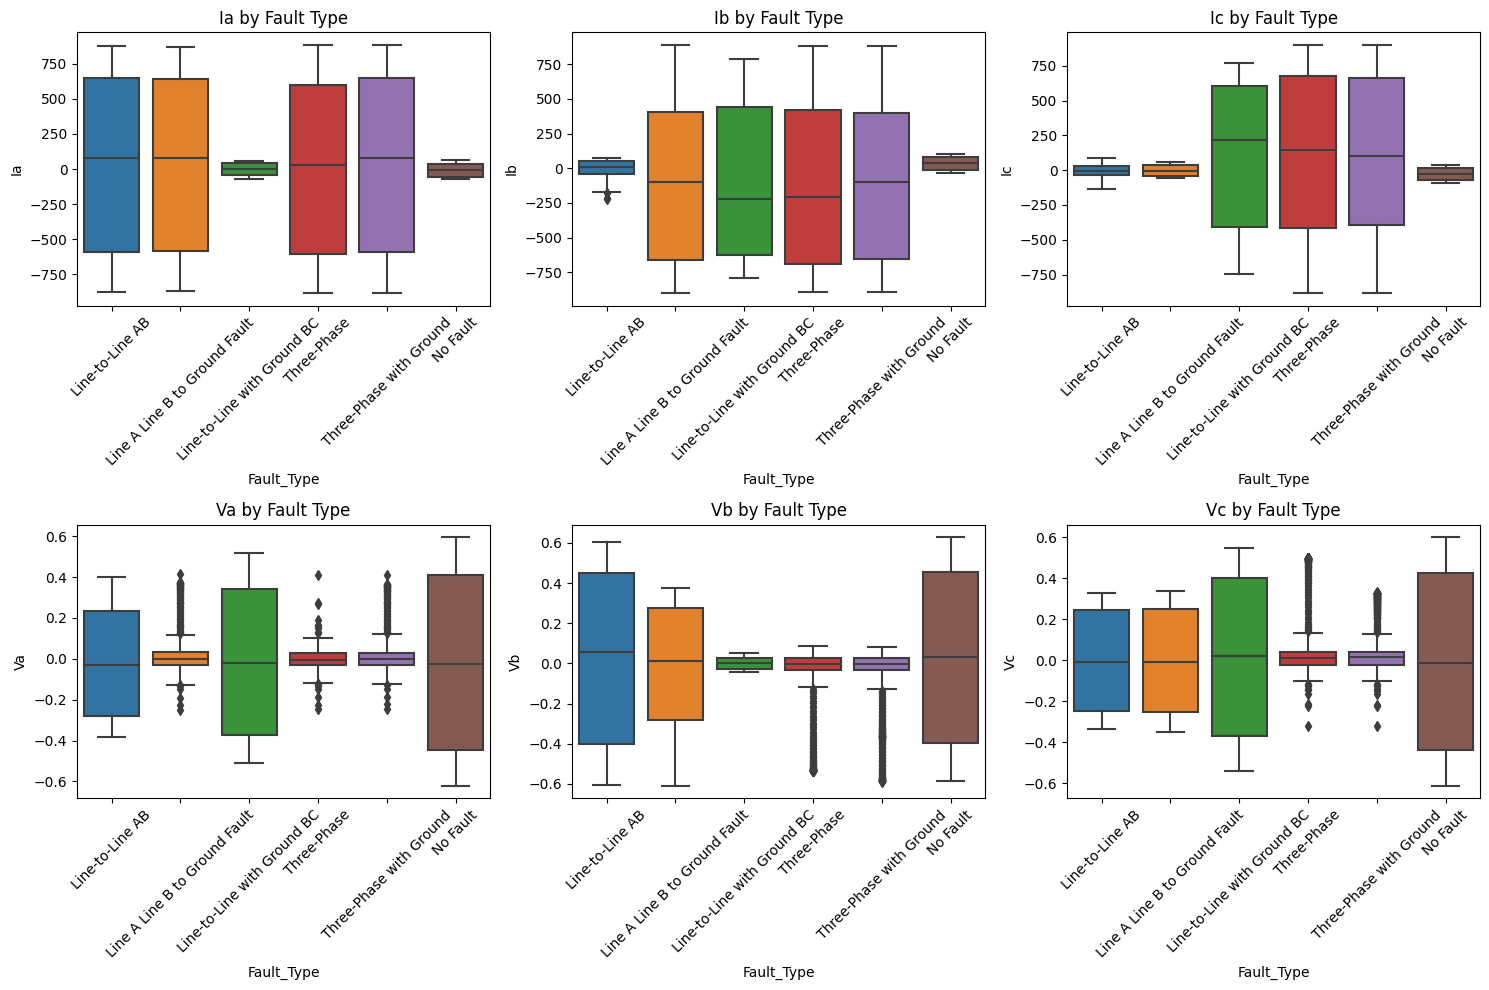

In [ ]:
# Boxplots for each feature by fault type
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Fault_Type', y=feature, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Fault Type')
plt.tight_layout()
plt.show()

From the provided box plots, we can observe significant differences in the distribution of features 'Ia', 'Ib', and 'Ic' among different fault types. Each fault type has its unique distribution of current feature values, especially in the absence of faults where all feature values are closely clustered around zero, indicating normal system operation. These differences in distributions suggest that different fault types can be effectively distinguished through these current feature values, which is of great significance for fault detection and classification.


### 2.8 Pairwise Relationships of Features

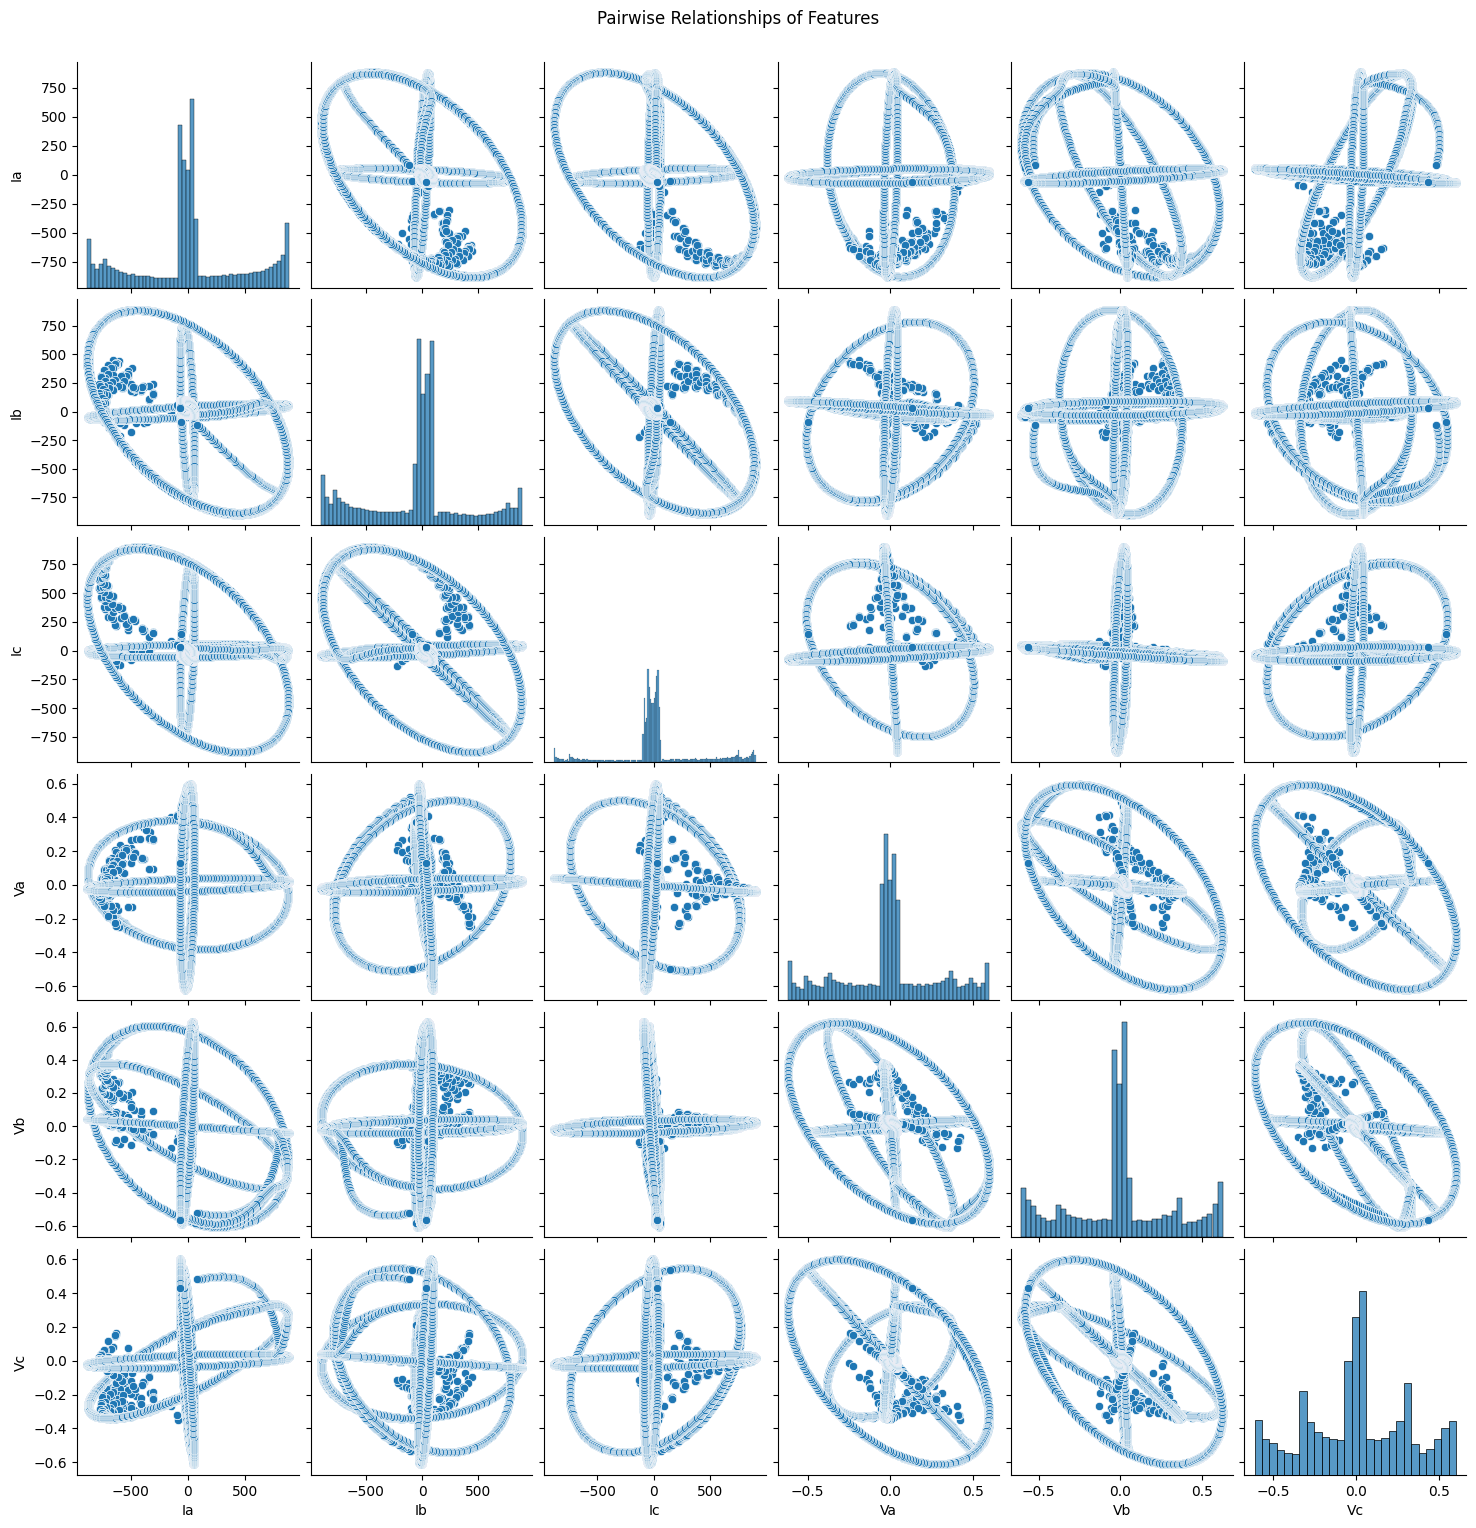

In [ ]:
# Pairplot to observe pairwise relationships and distributions
sns.pairplot(data[features])
plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()

##3.DATA PRE-PROCESSING

In [ ]:
np.unique(data['Fault_Type'])

array(['Line A Line B to Ground Fault', 'Line-to-Line AB',
       'Line-to-Line with Ground BC', 'No Fault', 'Three-Phase',
       'Three-Phase with Ground'], dtype=object)

##4.MODEL TRAINING

### 4.1 Preparing Data for Modelling


In [ ]:
from sklearn.model_selection import train_test_split

# Separate Features and Target
X = data.drop(['G','C','B','A','Fault_Type'], axis=1)
y = data['Fault_Type']

# Label Encoding on Target Variable
label_encode = {
    'No Fault': 0,
    'Line A Line B to Ground Fault': 1,
    'Three-Phase with Ground': 2,
    'Line-to-Line AB': 3,
    'Three-Phase': 4,
    'Line-to-Line with Ground BC': 5
}

# Mapping fault type codes to fault type names
y= y.map(label_encode)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7006)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5895, 6), (1966, 6), (5895,), (1966,))

### 4.2 Building Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree (DT)
model_1 = DecisionTreeClassifier(random_state=7006)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Random Forest (RF)
model_2 = RandomForestClassifier(random_state=7006)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

# Support Vector Machine (SVM)
model_3 = SVC(C=100.0, probability=True, random_state=7006)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

# Naive Bayes (NB)
model_4 = GaussianNB()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

# K-Nearest Neighbours (KNN)
model_5 = KNeighborsClassifier(n_neighbors=6)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)

##5.MODEL EVALUATION

### 5.1 Accuracy, Precision, Recall, and F-1 Score

In [ ]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

model_names = ['DT', 'RF', 'SVM', 'NB', 'KNN']

# Create list to store metric scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Compute metrics for each model
for y_pred in [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]:
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print the table
table_data = list(zip(model_names, accuracy_scores, precision_scores, recall_scores, f1_scores))
table_headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')
print(table)


+---------+------------+-------------+----------+------------+
| Model   |   Accuracy |   Precision |   Recall |   F1-Score |
+=========+============+=============+==========+============+
| DT      |    88.1485 |    0.881423 | 0.881485 |   0.881262 |
+---------+------------+-------------+----------+------------+
| RF      |    87.1312 |    0.87161  | 0.871312 |   0.871319 |
+---------+------------+-------------+----------+------------+
| SVM     |    81.2309 |    0.799409 | 0.812309 |   0.799185 |
+---------+------------+-------------+----------+------------+
| NB      |    79.705  |    0.790755 | 0.79705  |   0.769182 |
+---------+------------+-------------+----------+------------+
| KNN     |    83.2146 |    0.826691 | 0.832146 |   0.82357  |
+---------+------------+-------------+----------+------------+


### 5.2 Classification Report & Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report

# Curate Classification Report
model_list = [model_1,model_2,model_3,model_4,model_5]
model_pred = [y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5]
model_name = ["Decision Tree (DT)",
              "Random Forest (RF)",
              "Support Vector Machine (SVM)",
              "Naive Bayes (NB)",
              "k-Nearest Neighbour (kNN)"]
i = 0
for model in model_list:
  print(model_name[i])
  print(classification_report(y_test, model_pred[i]))
  print("\n")
  i += 1

Decision Tree (DT)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       272
           2       0.62      0.58      0.60       302
           3       1.00      1.00      1.00       257
           4       0.59      0.63      0.61       284
           5       1.00      1.00      1.00       265

    accuracy                           0.88      1966
   macro avg       0.87      0.87      0.87      1966
weighted avg       0.88      0.88      0.88      1966



Random Forest (RF)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       586
           1       1.00      1.00      1.00       272
           2       0.59      0.55      0.57       302
           3       1.00      1.00      1.00       257
           4       0.55      0.58      0.57       284
           5       1.00      1.00      1.00       265

    accuracy                         

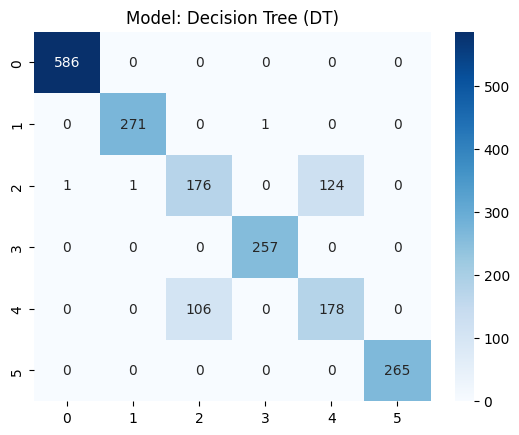

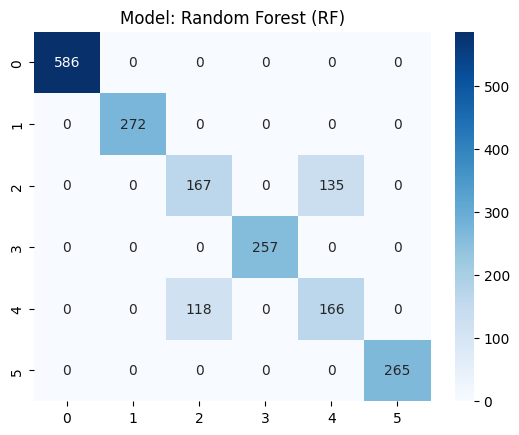

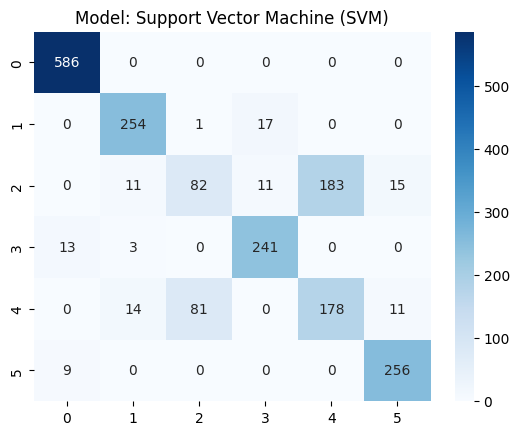

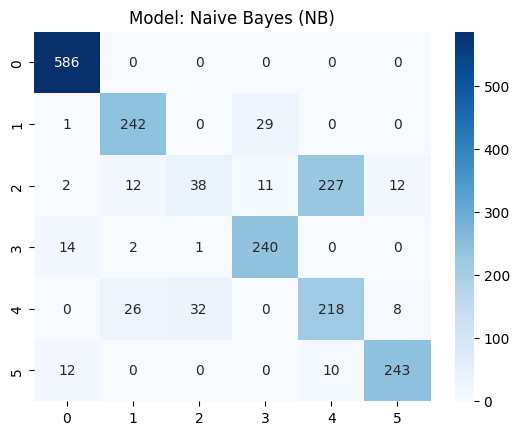

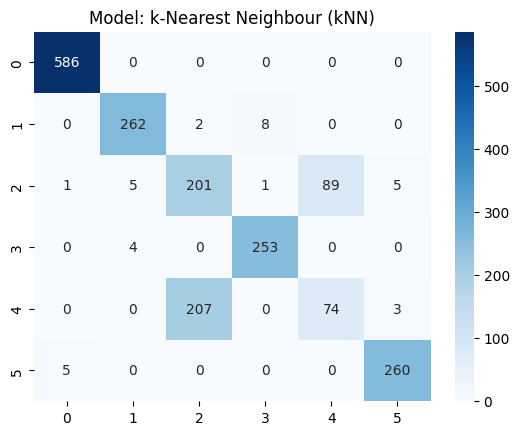

In [ ]:
# Confusion Matrix
i = 0
for model in model_pred:
  sns.heatmap(confusion_matrix(y_test, model), annot=True, cmap='Blues', fmt='.4g')
  plt.title(f'Model: {model_name[i]}')
  plt.show()
  i += 1

### 5.3 Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Set up k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=7006)

# Perform cross-validation for each model
i = 0
for model in model_list:
    accuracy_scores = cross_val_score(model, X, y, cv=k_fold, scoring=make_scorer(accuracy_score))

    # Print the results for each model
    print(f"{model_name[i]} - Cross-validated Accuracy Scores:", accuracy_scores)
    print(f"{model_name[i]} - Mean Accuracy:", round(np.mean(accuracy_scores),3))
    print()
    i += 1


Decision Tree (DT) - Cross-validated Accuracy Scores: [0.87666879 0.88867684 0.89440204 0.88931298 0.88549618]
Decision Tree (DT) - Mean Accuracy: 0.887

Random Forest (RF) - Cross-validated Accuracy Scores: [0.87031151 0.88231552 0.88231552 0.88295165 0.88040712]
Random Forest (RF) - Mean Accuracy: 0.88

Support Vector Machine (SVM) - Cross-validated Accuracy Scores: [0.81309599 0.80979644 0.80597964 0.8129771  0.81424936]
Support Vector Machine (SVM) - Mean Accuracy: 0.811

Naive Bayes (NB) - Cross-validated Accuracy Scores: [0.79084552 0.81234097 0.78880407 0.7894402  0.79770992]
Naive Bayes (NB) - Mean Accuracy: 0.796

k-Nearest Neighbour (kNN) - Cross-validated Accuracy Scores: [0.8245391  0.84033079 0.82061069 0.82251908 0.83587786]
k-Nearest Neighbour (kNN) - Mean Accuracy: 0.829



### 5.4 Model Prediction (Dashboard)

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
from ipywidgets import *

X_refer = X.copy()
# Define the function to predict the fault type
def predict_fault_type(X_input):

    prediction = model_1.predict(X_input)

    label_encode = {
        0 : 'No Fault',
        1 : 'Line A Line B to Ground Fault',
        2 : 'Three-Phase with Ground',
        3 : 'Line-to-Line AB',
        4 : 'Three-Phase',
        5 : 'Line-to-Line with Ground BC'
    }

    return label_encode[prediction[0]]

@interact
# Create the user input dashboard
def dashboard():

    # Create the sliders for the features
    Ia_slider = FloatSlider(min=np.min(X_refer['Ia']), max=np.max(X_refer['Ia']), value=np.mean(X_refer['Ia']), step=0.1, description='Ia')
    Ib_slider = FloatSlider(min=np.min(X_refer['Ib']), max=np.max(X_refer['Ib']), value=np.mean(X_refer['Ib']), step=0.1, description='Ib')
    Ic_slider = FloatSlider(min=np.min(X_refer['Ic']), max=np.max(X_refer['Ic']), value=np.mean(X_refer['Ic']), step=0.1, description='Ic')
    Va_slider = FloatSlider(min=np.min(X_refer['Va']), max=np.max(X_refer['Va']), value=np.mean(X_refer['Va']), step=0.1, description='Va')
    Vb_slider = FloatSlider(min=np.min(X_refer['Vb']), max=np.max(X_refer['Vb']), value=np.mean(X_refer['Vb']), step=0.1, description='Vb')
    Vc_slider = FloatSlider(min=np.min(X_refer['Vc']), max=np.max(X_refer['Vc']), value=np.mean(X_refer['Vc']), step=0.1, description='Vc')

    # Create the button to predict the fault type
    predict_button = Button(description='Predict')

    # Create the output text for the predicted fault type
    output_text = Text(value='', placeholder='Predicted fault type')

    # Create the layout for the dashboard
    layout = Layout(display='flex', flex_flow='row wrap', align_items='center')

    # Create the HBox for the sliders
    hbox = HBox([Ia_slider, Ib_slider, Ic_slider, Va_slider, Vb_slider, Vc_slider])

    # Create the VBox for the dashboard
    vbox = VBox([hbox, predict_button, output_text], layout=layout)

    # Define the function to handle the button click
    def on_predict_button_clicked(event):
        # Get the values from the sliders
        Ia = Ia_slider.value
        Ib = Ib_slider.value
        Ic = Ic_slider.value
        Va = Va_slider.value
        Vb = Vb_slider.value
        Vc = Vc_slider.value

        # Create the input data
        X_input = np.array([[Ia, Ib, Ic, Va, Vb, Vc]])

        # Predict the fault type
        y_pred = predict_fault_type(X_input)

        # Update the output text
        output_text.value = y_pred

    # Connect the button click event to the function
    predict_button.on_click(on_predict_button_clicked)

    # Return the dashboard
    return vbox


interactive(children=(Output(),), _dom_classes=('widget-interact',))

##6.CONCLUSION


In conclusion, the performance of various machine learning models was evaluated based on key metrics such as accuracy, precision, recall, and F1-score. The results indicate that the Decision Tree (DT) model achieved the highest accuracy at 88.15%, closely followed by the Random Forest (RF) model with an accuracy of 87.13%. Both DT and RF models demonstrated strong precision, recall, and F1-score values, suggesting a robust overall performance.

The Support Vector Machine (SVM) exhibited a slightly lower accuracy of 81.23% but demonstrated competitive precision and recall values. While the Naive Bayes (NB) model showcased reasonable metrics, it had a comparatively lower accuracy of 79.71%.

The K-Nearest Neighbors (KNN) model achieved an accuracy of 83.21%, accompanied by balanced precision and recall scores. It falls in between the Decision Tree/Random Forest and SVM/NB models in terms of overall performance.

In our project, cross validation is also performed and the accuracy scores are also obtained. we observe that the Decision Tree (DT) model exhibits consistently high performance across different folds, with accuracy scores ranging from 87.67% to 89.44%. The mean accuracy of 88.7% further validates its robustness and reliability in generalizing to unseen data.

Similarly, the Random Forest (RF) model demonstrates stable performance, with accuracy scores ranging from 87.03% to 88.30%. The mean accuracy of 88% suggests that the ensemble approach employed by the Random Forest contributes to a reliable and consistent predictive capability.

On the other hand, the Support Vector Machine (SVM) model displays a slightly lower mean accuracy of 81.1%, indicating a moderate but respectable performance. The cross-validated accuracy scores consistently hover around the 81% mark, reinforcing the model's ability to maintain stability across different subsets of the dataset.

The Naive Bayes (NB) model, with a mean accuracy of 79.6%, demonstrates reasonable consistency in performance. Although it trails behind the Decision Tree and Random Forest models, its stable accuracy scores across folds highlight its potential applicability, especially in scenarios where simplicity and interpretability are valued.

The k-Nearest Neighbour (kNN) model, with a mean accuracy of 82.9%, exhibits competitive performance. The accuracy scores ranging from 82.06% to 84.03% underscore the model's ability to capture patterns in the data effectively.

In summary, the Decision Tree and Random Forest models continue to showcase strong overall performance, with consistently high accuracy scores across folds. The Support Vector Machine, Naive Bayes, and k-Nearest Neighbour models also display commendable performance